In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.4 MB/s eta 0:00:00


Enter the SMILES representation of the molecule: C(CC(=O)N)C(C(=O)O)N


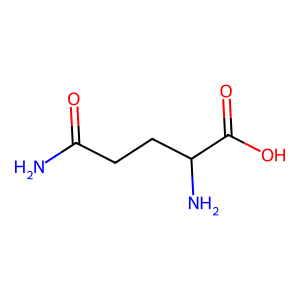

Number of nodes (atoms): 10
Number of edges (bonds): 9


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Take SMILES input from the user
smiles = input("Enter the SMILES representation of the molecule: ")

# Convert the SMILES string to a molecule object
mol = Chem.MolFromSmiles(smiles)

if mol is not None:
    # Count the number of atoms (nodes) and bonds (edges)
    num_atoms = mol.GetNumAtoms()
    num_bonds = mol.GetNumBonds()

    # Draw the molecule and display it
    img = Draw.MolToImage(mol)
    display(img)

    # Print the number of nodes (atoms) and edges (bonds)
    print("Number of nodes (atoms):", num_atoms)
    print("Number of edges (bonds):", num_bonds)
else:
    print("Invalid SMILES representation. Please check and try again.")

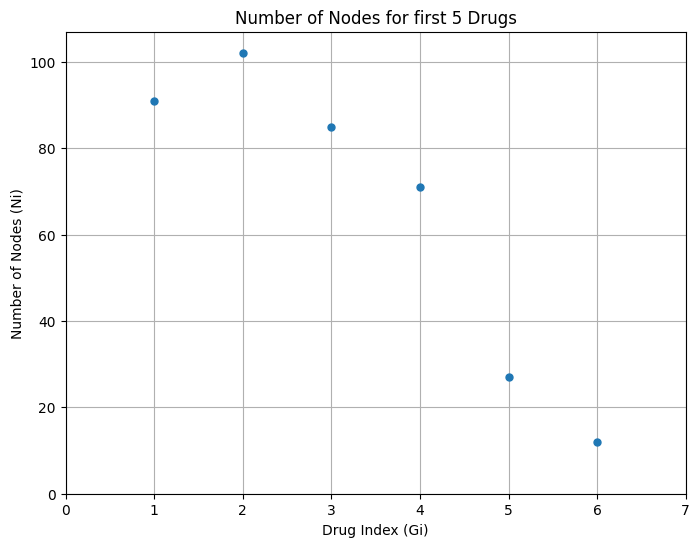

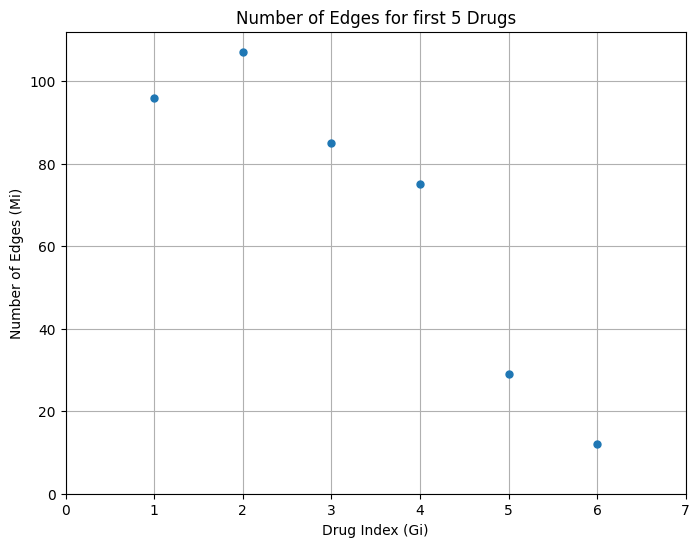

In [ ]:
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt

# Load your dataset (assuming you want the first 5 rows only)
data = pd.read_csv('/content/alldrugbank.csv', nrows=6)

# Define lists to store number of nodes and edges
num_nodes = []
num_edges = []

# Define a function to calculate number of nodes and edges for each drug
def calculate_nodes_and_edges(smiles):
  mol = Chem.MolFromSmiles(smiles)
  # Calculate number of nodes (atoms) and edges (bonds)
  num_atoms = mol.GetNumAtoms()
  num_bonds = mol.GetNumBonds()
  return num_atoms, num_bonds

# Iterate through the first 5 rows and calculate nodes and edges for each drug
for index, row in data.iterrows():
  canonical_smiles = row['canonical']
  # Calculate number of nodes and edges for the current drug
  n1, m1 = calculate_nodes_and_edges(canonical_smiles)
  # Append to the lists
  num_nodes.append(n1)
  num_edges.append(m1)

# Plot the points for number of nodes (Ni)
plt.figure(figsize=(8, 6))  # Adjust figure size for fewer data points
plt.plot(range(1, len(num_nodes) + 1), num_nodes, marker='o', linestyle='', markersize=5)
plt.xlabel('Drug Index (Gi)')
plt.ylabel('Number of Nodes (Ni)')
plt.title('Number of Nodes for first 5 Drugs')
plt.grid(True)

# Set y-axis limits based on data in first 5 rows (assuming values are non-negative)
plt.ylim(0, max(num_nodes) + 5)  # Adjust upper limit for better visualization

# Set x-axis limits to show all 5 data points clearly
plt.xlim(0, len(num_nodes) + 1)

plt.show()

# Plot the points for number of edges (Mi)
plt.figure(figsize=(8, 6))  # Adjust figure size for fewer data points
plt.plot(range(1, len(num_edges) + 1), num_edges, marker='o', linestyle='', markersize=5)
plt.xlabel('Drug Index (Gi)')
plt.ylabel('Number of Edges (Mi)')
plt.title('Number of Edges for first 5 Drugs')
plt.grid(True)

# Set y-axis limits based on data in first 5 rows (assuming values are non-negative)
plt.ylim(0, max(num_edges) + 5)  # Adjust upper limit for better visualization

# Set x-axis limits to show all 5 data points clearly
plt.xlim(0, len(num_edges) + 1)

plt.show()


Enter 5 comma-separated row indices (within range 0 to 2069): 2011,2012,2013,2014,2015


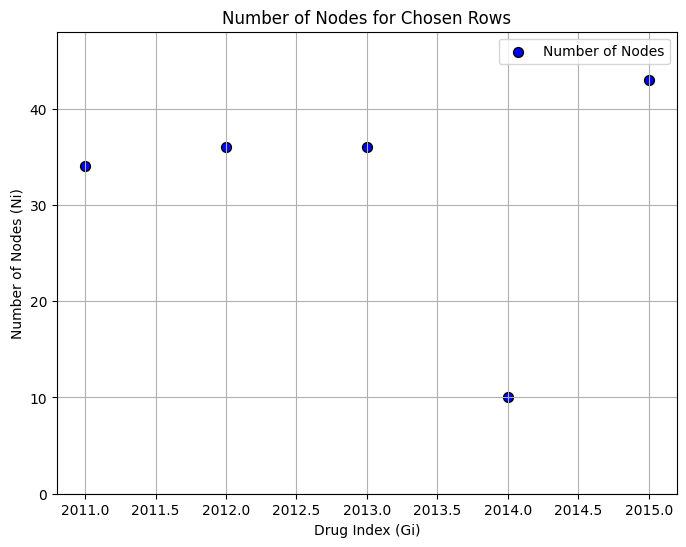

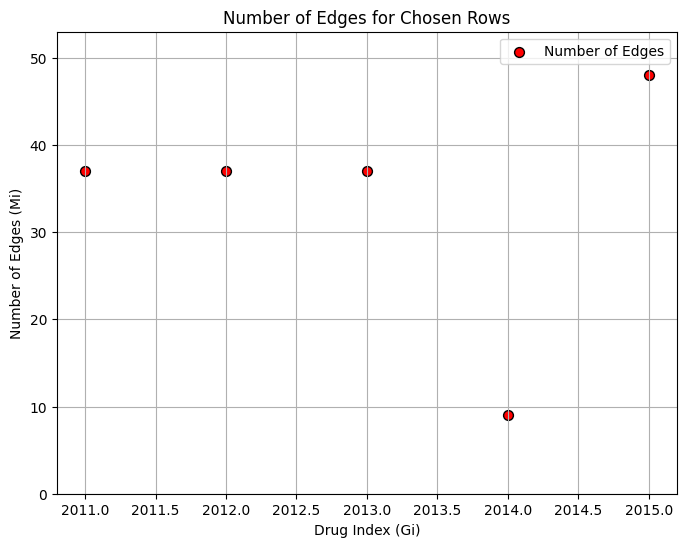

In [ ]:
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/alldrugbank.csv')

# Get the total number of rows
num_rows = len(data)

# Prompt user to enter 5 comma-separated row indices
while True:
  try:
    user_input = input("Enter 5 comma-separated row indices (within range 0 to " + str(num_rows-1) + "): ")
    # Split the input string into a list of integers
    row_indices = [int(x) for x in user_input.split(",")]

    # Check if all indices are within valid range (0 to num_rows-1)
    if all(0 <= idx < num_rows for idx in row_indices):
      # Valid input, break out of the loop
      break
    else:
      print("Invalid input. Please enter comma-separated indices between 0 and", num_rows-1)
  except ValueError:
    print("Invalid input. Please enter comma-separated integers.")

# Select the chosen rows from the dataset
chosen_data = data.iloc[row_indices]

# Define lists to store drug indices, number of nodes, and edges
drug_indices = chosen_data.index.to_list()  # Get drug indices from chosen rows
num_nodes = []
num_edges = []

# Define a function to calculate number of nodes and edges for each drug
def calculate_nodes_and_edges(smiles):
  mol = Chem.MolFromSmiles(smiles)
  # Calculate number of nodes (atoms) and edges (bonds)
  num_atoms = mol.GetNumAtoms()
  num_bonds = mol.GetNumBonds()
  return num_atoms, num_bonds

# Iterate through the chosen rows and calculate nodes, edges for each drug
for index, row in chosen_data.iterrows():
  canonical_smiles = row['canonical']
  # Calculate number of nodes and edges for the current drug
  n1, m1 = calculate_nodes_and_edges(canonical_smiles)
  # Append to the lists
  num_nodes.append(n1)
  num_edges.append(m1)

# Plot the points for number of nodes (Ni) with drug indices
plt.figure(figsize=(8, 6))
plt.scatter(drug_indices, num_nodes, marker='o', c='b', edgecolors='k', s=50, label='Number of Nodes')
plt.xlabel('Drug Index (Gi)')
plt.ylabel('Number of Nodes (Ni)')
plt.title('Number of Nodes for Chosen Rows')
plt.grid(True)

# Set y-axis limits based on data in chosen rows (assuming values are non-negative)
plt.ylim(0, max(num_nodes) + 5)  # Adjust upper limit for better visualization

# Add legend
plt.legend()

plt.show()

# Plot the points for number of edges (Mi) with drug indices
plt.figure(figsize=(8, 6))
plt.scatter(drug_indices, num_edges, marker='o', c='r', edgecolors='k', s=50, label='Number of Edges')
plt.xlabel('Drug Index (Gi)')
plt.ylabel('Number of Edges (Mi)')
plt.title('Number of Edges for Chosen Rows')
plt.grid(True)

# Set y-axis limits based on data in chosen rows (assuming values are non-negative)
plt.ylim(0, max(num_edges) + 5)  # Adjust upper limit for better visualization

# Add legend
plt.legend()

plt.show()


In [ ]:
from rdkit import Chem

def calculate_max_degree(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # List to store degrees of each atom
        degrees = []
        for atom in mol.GetAtoms():
            # Get the degree of the current atom (number of bonds)
            degree = atom.GetDegree()
            # Add the degree to the list
            degrees.append(degree)
        # Return the maximum degree among all atoms
        return max(degrees)
    else:
        return None

# Prompt user for SMILES input
smiles_input = input("Enter the SMILES string: ").strip()

# Calculate maximum degree
max_degree = calculate_max_degree(smiles_input)

# Display the result
if max_degree is not None:
    print("Maximum degree:", max_degree)
else:
    print("Invalid SMILES input.")


Enter the SMILES string: C(CC(=O)N)C(C(=O)O)N
Maximum degree: 3
